In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
# User-defined modules
from financial_data import *

In [2]:
comb = load_combined()
print(comb.head())

   loan_id  account_id  loan_date  loan_amount  duration  payments status  \
0     4959           2 1994-01-05     0.129680      0.25  0.319488      A   
1     4961          19 1996-04-29     0.043179      0.00  0.231001      B   
2     4962          25 1997-12-08     0.043179      0.00  0.231001      A   
3     4967          37 1998-10-14     0.535129      1.00  0.520924      D   
4     4968          38 1998-04-19     0.180520      0.75  0.208516      C   

   district_id frequency account_date  ...  \
0            1   monthly   1993-02-26  ...   
1           21   monthly   1995-04-07  ...   
2           68   monthly   1996-07-28  ...   
3           20   monthly   1997-08-18  ...   
4           19    weekly   1997-08-08  ...   

   no_of_municipalities_with_inhabitants_between_1000_to_9999  \
0                                               0.00            
1                                               0.35            
2                                               0.90            


In [7]:
# ML systems work with integers, we need to encode these string characters into ints
encoder = LabelEncoder()

#now apply transformation to all the columns:

for col in comb.columns:
    comb[col] = encoder.fit_transform(comb[col])
    
X_features = comb.iloc[:,1:36]
y_label = comb.iloc[:,0]

In [9]:
print(y_label.head())

0    0
1    1
2    2
3    3
4    4
Name: loan_id, dtype: int64


In [10]:
#scale the features

scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

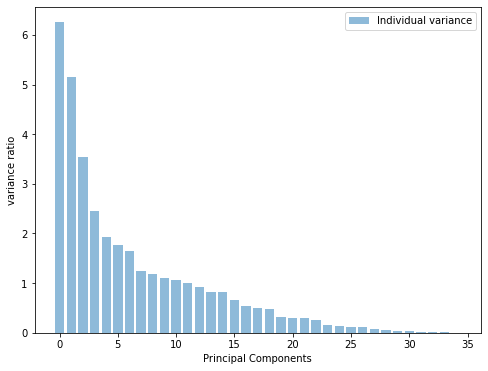

In [15]:
# visualize

pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8,6))
plt.bar(range(35), pca_variance, alpha=0.5, align='center', label='Individual variance')
plt.legend()
plt.ylabel('variance ratio')
plt.xlabel('Principal Components')
plt.show()